In [17]:
import torch
from torch import nn

from visualize import plot_hist, plot_stats
from train import train, Statistics
from elbo import ELBO
from mixture_models import InfiniteMixtureModel
from distributions import StudentT, Gamma, Distribution, VariationalModel
from divergences import forward_kl

In [3]:
torch.manual_seed(42)
variational_model = VariationalModel(
    input_dim=1,
    hidden_sizes=[16, 16],
    activation='ReLU',
    distribution=Gamma,
    output_shapes=[1, 1],
    output_activations=['Softplus', 'Softplus'],
)

In [4]:
p_model = InfiniteMixtureModel([90.0], [-10.0], [5.0])
q_model = InfiniteMixtureModel([80.0], [-10.0], [5.0])

In [8]:
elbo_loss = ELBO(variational_model, optimizer='Adamax', lr=0.01, num_iterations=1)

In [6]:
stats = Statistics()

In [14]:
stats = train(
    p_model,
    q_model,
    elbo_loss,
    optimizer="Adamax",
    lr=0.1,
    epochs=30001,
    log_interval=1000,
    batch_size=512,
    stats=stats,
)

[Epoch 0/30001]	Loss 3.10
[Epoch 1000/30001]	Loss 3.08
[Epoch 2000/30001]	Loss 3.02
[Epoch 3000/30001]	Loss nan


KeyboardInterrupt: 

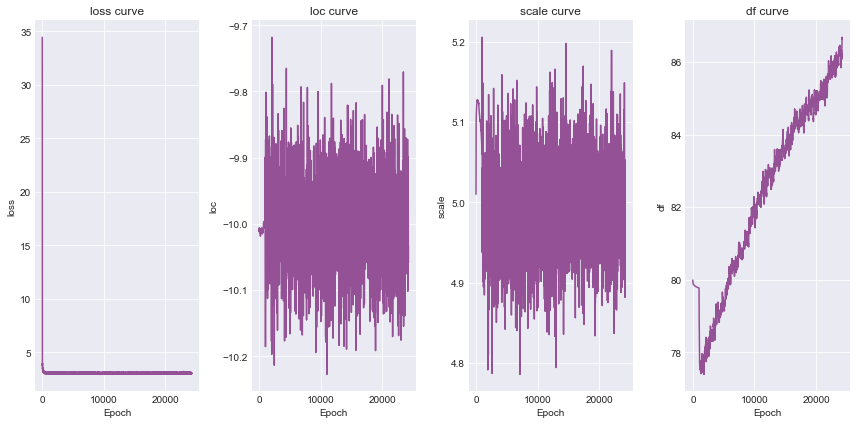

In [15]:
plot_stats(stats)

In [27]:
p_model = StudentT([90.0], [-10.0], [5.0])
q_model = StudentT([85.0], [-10.0], [5.0])
stats = Statistics()

In [30]:
stats = train(
    p_model,
    q_model,
    forward_kl,
    lr=0.02,
    epochs=30001,
    log_interval=1000,
    batch_size=512,
    stats=stats,
)

[Epoch 0/30001]	Loss 3.11
[Epoch 1000/30001]	Loss 3.03
[Epoch 2000/30001]	Loss 3.05
[Epoch 3000/30001]	Loss 2.97
[Epoch 4000/30001]	Loss 3.05
[Epoch 5000/30001]	Loss 3.03
[Epoch 6000/30001]	Loss 3.03
[Epoch 7000/30001]	Loss 3.00
[Epoch 8000/30001]	Loss 2.97
[Epoch 9000/30001]	Loss 3.06
[Epoch 10000/30001]	Loss 3.01
[Epoch 11000/30001]	Loss 3.07
[Epoch 12000/30001]	Loss 3.05
[Epoch 13000/30001]	Loss 3.03
[Epoch 14000/30001]	Loss 3.07
[Epoch 15000/30001]	Loss 3.08
[Epoch 16000/30001]	Loss 3.00
[Epoch 17000/30001]	Loss 3.07
[Epoch 18000/30001]	Loss 3.01
[Epoch 19000/30001]	Loss 3.05
[Epoch 20000/30001]	Loss 3.06
[Epoch 21000/30001]	Loss 3.06
[Epoch 22000/30001]	Loss 3.04
[Epoch 23000/30001]	Loss 3.07
[Epoch 24000/30001]	Loss 3.06
[Epoch 25000/30001]	Loss 3.07
[Epoch 26000/30001]	Loss 3.03
[Epoch 27000/30001]	Loss 3.05
[Epoch 28000/30001]	Loss 3.06
[Epoch 29000/30001]	Loss 3.04
[Epoch 30000/30001]	Loss 3.06


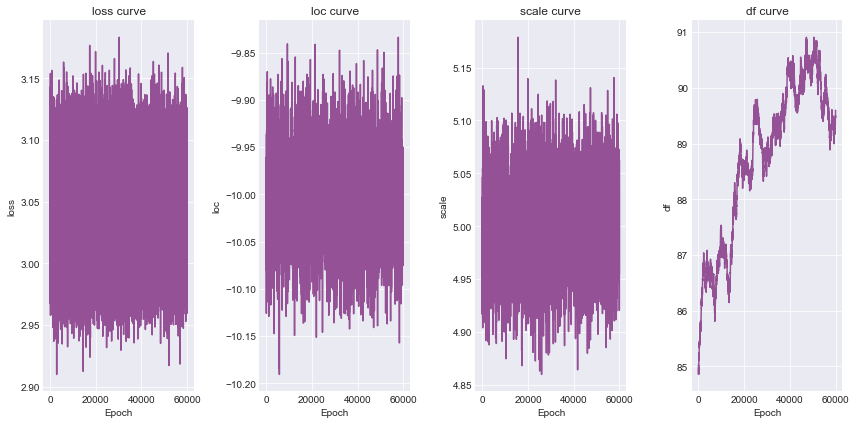

In [31]:
plot_stats(stats)